# Manifold Learning and The Curse of Dimensionality
*```'When life gives you lemons, go get yourself their underlying manifold'```*


```In this exercise we will get to know the field of manifold learning and will study some of its applications. We will face the widely used algorithms and methods of the field and explore their relative advantages and disadvantages.```

```Manifold learning assumes that data points, although they can live in a very high dimensional space, are often drawn from a lower dimensional manifold embedded in the high dimensional space. The purpose of manifold learning is to find this manifold, or, in other words, to find a low dimensional representation for the data points```

```The field, as you could guess, is mostly concerned with unsupervised learning, which makes it all much harder and less rewarding :) have fun!```

Notes:

- ```Questions will be marked by a question mark ('?'). Whenever you see is, answer the question in a cell for further discussion with your tutor.```

- ```This exercise involves some relatively big reading tasks. Do not skip them, they are essential for producing the best of the exercise.```

```~Ittai Haran```

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Part I- Motivation and the Curse of Dimensionality
```In this part we will learn of some of the characteristics that make high dimensional data really hard to work with.```

```Load the MNIST data and drop the 'label' field (it's the unsupervised kingdom here, remember?). This will be our high dimensional data. Note that MNIST is specially easy to work with, since we can draw the images, and so we are able to interpret all the features together. Normally this isn't the case. We will use this example nonetheless for its pedagogic value.```

In [25]:
df = pd.read_csv('MNIST_train.csv').drop("label", axis = 1)

- ```Scale the data using StandardScaler. Clip the data so every feature is between -5 and 5 (since we set the data variance to be 1, we keep most of the data untouched). Name it df_alter.```

- ```Choose randomly 10,000 pairs of samples and compute he distance between them. Draw its distribution. What can you learn about the space?```
- ```Try using DBSCAN on the data and to get 10 classes using your newly earned knowledge. Can you do it? Why is it very hard? Make sure to work with size of data you can handle. Is this demand is inevitable in our case? why?```
- ```Note: clustering the MNIST dataset into 10 classes is indeed a task that you would expect to be pretty easy :)```

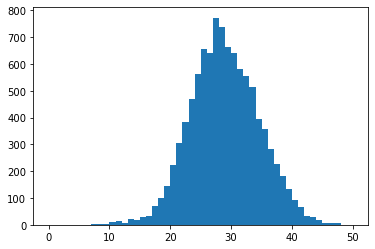

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)
df_alter = np.clip(df, -5,5)

distances = []
for i in range(10000):
    place_1, place_2 = np.random.randint(0, len(df), 2)
    distances.append(np.linalg.norm(df_alter[place_1]-df_alter[place_2]))
plt.hist(distances, bins = 50)
plt.show()

In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=10, n_jobs=-1, min_samples=10)
clusters = dbscan.fit_predict(df_alter[:5000])

print(len(set(clusters)))

2


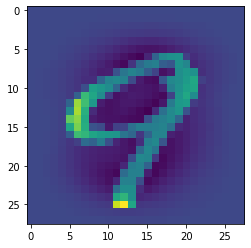

In [12]:
arr = df[100]
arr = arr.reshape(28, 28)

plt.imshow(arr)
plt.show()

```Don't continue before you understands exactly why you couldn't cluster the data as you wished, and refer in your explanation to the distances distribution you drew. In fact, don't continue before you explain it to another person sitting with you in the room.```

- ```Compute the l2 norm of every sample from df_alter.```
- ```Draw a histogram of the norms you got.```
- ```Take only the samples with norm within 2 standard deviations from the mean (about 95% of the data).```
- ```Draw the histogram of the selected norms, when the x axis starts from 0.```
- ```What can you tell about the density of the samples in the n dimensional ball? How can you interpret it geometrically?```
- ```Generate 10,000 samples on a 2 dimensional unit sphere. Add each sample a gaussian noise with standard deviation 0.1. Repeat the last tasks for your new data. Are the histograms somewhat similar? why?```
- ```Based on this geometric intuition, why is clustering  high dimensional data using Kmeans is a hard task? Explain it to yourself, and than to another person sitting with you in the room.```

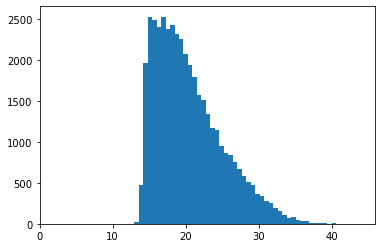

In [17]:
norms = np.linalg.norm(df_alter, axis = 1)

plt.hist(norms, bins = 50)
plt.xlim([0, (max(norms)*1.05)])
plt.show()

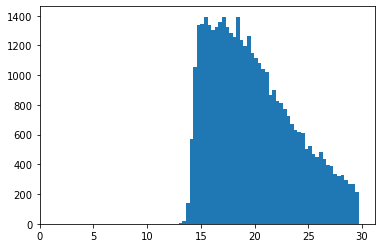

In [19]:
norms_std = np.std(norms)
norms_mean = np.mean(norms)
norms_filtered = list(filter(lambda x: np.abs(x-norms_mean)<2*norms_std, norms))

plt.hist(norms_filtered, bins = 50)
plt.xlim([0, (max(norms_filtered)*1.05)])
plt.show()

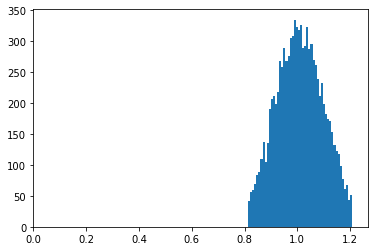

In [20]:
sphere = np.random.uniform(-1,1,(10000,3))
sphere = sphere/np.linalg.norm(sphere, axis = 1).reshape(-1,1)
sphere = sphere + np.random.normal(0, 0.1, (10000,3))

sphere_norms = np.linalg.norm(sphere, axis = 1)
norms_sphere_std = np.std(sphere_norms)
norms_sphere_mean = np.mean(sphere_norms)
norms_sphere_filtered = list(filter(lambda x: np.abs(x-norms_sphere_mean)<2*norms_sphere_std, sphere_norms))

plt.hist(norms_sphere_filtered, bins = 50)
plt.xlim([0, (max(norms_sphere_filtered)*1.05)])
plt.show()

```Read the enlightening Wikipedia page about the curse of dimensionality ```(https://en.wikipedia.org/wiki/Curse_of_dimensionality).

## Part II- Visualizing High Dimensional Data
```Using a variety of known algorithms to visualize high dimensional data. Also, you are about to work pretty hard on generating datasets for algorithm testing purposes, a skill sometimes turns out to be useful.```

```Read about the following algorithms: PCA (this one you probably have met before), MDS, Isomap and TSNE. No need to read the papers, the general idea is enough. Read up to the level where you can explain how each algorithm works, and the main differences between them.```

In [9]:
from sklearn.manifold import Isomap, MDS, TSNE
from sklearn.decomposition import PCA

```Load the MNIST data again. This time, keep the labels separately from the features. Normalize the features as you did during the previous part.```

In [27]:
df = pd.read_csv('MNIST_train.csv')

target = df['label']
df = df.drop("label", axis = 1)

scaler = StandardScaler()
df = scaler.fit_transform(df)
df_alter = np.clip(df, -5,5)

- ```Take 1,000 samples.```
- ```Use The four different algorithms to reduce the data to have 2 features. Draw a scatter plot of the data for each algorithm.```
- ```Can you favor any algorithm over the others?```
- ```Draw the scatter plots again, except this time color the samples with their class. Can you favor any algorithm now?```

In [ ]:
list_algo =  [PCA(2), MDS(n_components = 2, n_jobs = -1), 
              Isomap(n_neighbors=50, n_components=2, n_jobs = -1), TSNE()]

for emb in list_algo:
    reduced_data = emb.fit_transform(df_alter[:1000])
    plt.scatter(reduced_data[:,0], reduced_data[:,1], c = target.iloc[:1000])
    plt.title(str(emb)[:str(emb).find('(')])
    plt.show()

```In general, visualizing high dimensional data, especially unlabeld data, is a very hard task.
We will now generate some datasets and try to visualize them, as we know how they are supposed to look like. For each dataset, create it as instructed, run the four algorithms on it and to explain your results, while regarding the technique each algorithm uses.```

```Hint: you might want to use the following function, that generates a random n dimensional rotation matrix.```

In [5]:
def rvs(dim=3):
    random_state = np.random
    H = np.eye(dim)
    D = np.ones((dim,))
    for n in range(1, dim):
        x = random_state.normal(size=(dim-n+1,))
        D[n-1] = np.sign(x[0])
        x[0] -= D[n-1]*np.sqrt((x*x).sum())
        # Householder transformation
        Hx = (np.eye(dim-n+1) - 2.*np.outer(x, x)/(x*x).sum())
        mat = np.eye(dim)
        mat[n-1:, n-1:] = Hx
        H = np.dot(H, mat)
        # Fix the last sign such that the determinant is 1
    D[-1] = (-1)**(1-(dim % 2))*D.prod()
    # Equivalent to np.dot(np.diag(D), H) but faster, apparently
    H = (D*H.T).T
    return H

- ```1 dimensional sphere in a 6 dimensional space (add 4 coordinates with 0).```
- ```1 dimensional sphere in a 6 dimensional space, rotated with a random rotation matrix (multiply the rotation matrix from the left).```
- ```1 dimensional sphere in a 6 dimensional space, with normal noise with standard deviation of 0.1```.
- ```2 dimensional sphere with l1 norm (all x,y so |x+y+z|=1) in a 6 dimensional space. Take only x,y,z where at least one of them is negative. Rotated the dataset using a random rotation matrix. You can color each face with different color: Before you rotate the dataset, note that for each face has unique (sign(x), sign(y), sign(z)). You can use this unique tuple to produce a color.```

In [6]:
from sklearn.preprocessing import Normalizer

def random_rotation(dataset):
    return np.dot(rvs(dataset.shape[1]), dataset.transpose()).transpose()

In [7]:
def reduce_and_draw(dataset, dataset_color = None):
    for emb in [PCA(2), MDS(n_components = 2, n_jobs = -1),
                Isomap(n_neighbors=10, n_components=2, n_jobs = -1), 
                TSNE(n_components=2)]:
        reduced_data = emb.fit_transform(dataset)
        plt.scatter(reduced_data[:,0], reduced_data[:,1], c = dataset_color)
        plt.title(str(emb)[:str(emb).find('(')])
        plt.show()

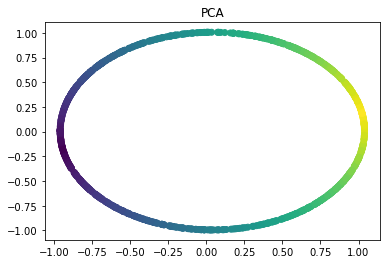

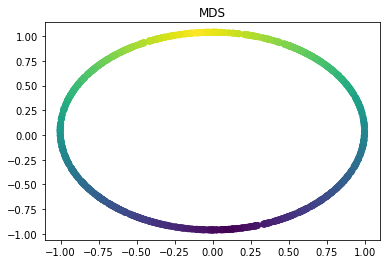

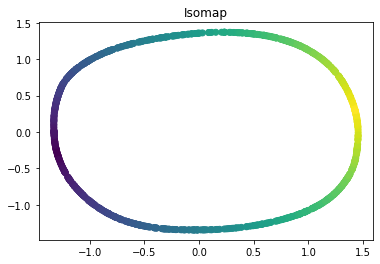

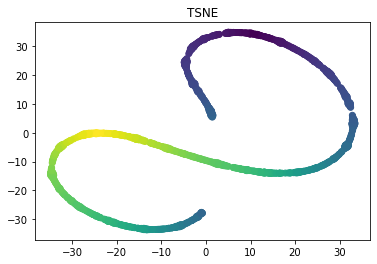

In [11]:
sphere_1_6 = Normalizer().fit_transform(np.concatenate((np.random.uniform(-1,1,(1000,2)), 
                                                        np.zeros((1000,4))), axis = 1))
sphere_1_6_color = np.arccos(sphere_1_6[:,0])

reduce_and_draw(sphere_1_6, sphere_1_6_color)

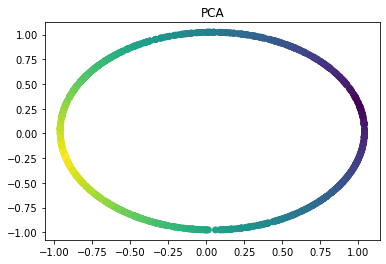

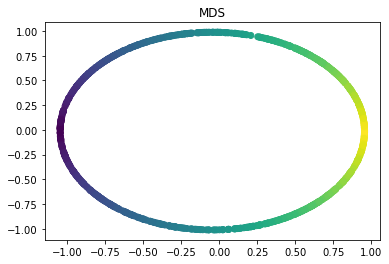

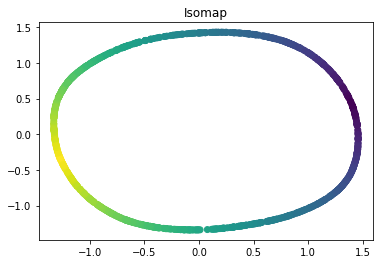

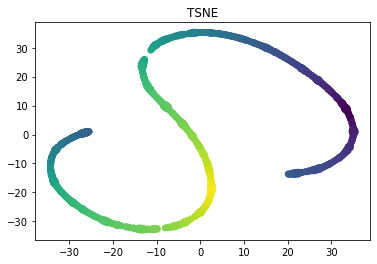

In [46]:
rotated_sphere_1_6 = random_rotation(sphere_1_6)
rotated_sphere_1_6_color = sphere_1_6_color

reduce_and_draw(rotated_sphere_1_6, rotated_sphere_1_6_color)

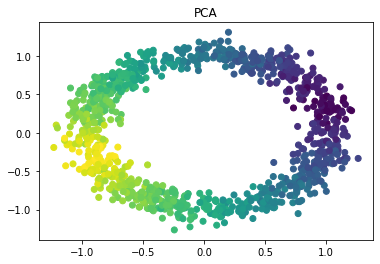

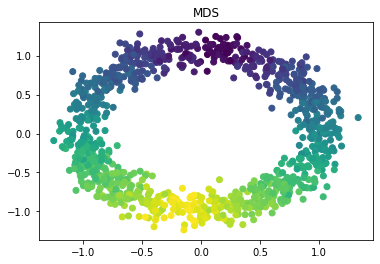

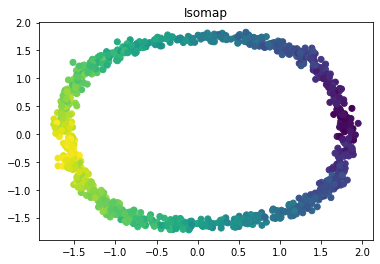

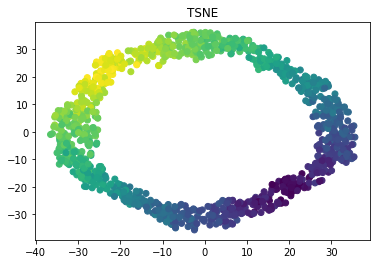

In [47]:
rotated_errored_sphere_1_6 = random_rotation(sphere_1_6)+np.random.normal(0, 0.1, (1000,6))
rotated_errored_sphere_1_6_color = sphere_1_6_color

reduce_and_draw(rotated_errored_sphere_1_6, rotated_errored_sphere_1_6_color)

```Bonus- where the dataset are actually one parametric (here, the 1 spheres), try coloring the scatter plots using this parameter (for the 1 spheres, the angle).```

```Try also to reduce these datasets to 1 feature, and plot them, this time by sorting the samples using the one parameter (the angle) and using plt.scatter, where x = y = embedding.```

```Add small noise to the plot, and set alpha = 0.7, so you can see all the samples on the graph.```

## Part III- Choosing the Manifold's Dimension

```As you saw before, all the algorithms we used earlier assume a previous knowledge about the manifold's dimension. Here we will meet a specific method for choosing it. We will see how nice it works on generated data, and how it doesn't really work on real data :)```

```Open the paper Maximum Likelihood Estimation of Intrinsic Dimension, which you can find in the papers directory. Read the first three paragraphs of section 2, and implement this technique for each of the datasets you created at the previous part.
Hint: When evaluating the slope of the linear part, remember: You are a data scientist! sklearn.linear_model.LinearRegression is at you command.```

In [2]:
from scipy.spatial import distance_matrix
from sklearn.linear_model import LinearRegression

In [15]:
def maximum_likelihood_estimation(data, min_dist=0, max_dist=1, count=1000):
    matrix = distance_matrix(data[:count], data[:count])
    r_options = np.linspace(min_dist, max_dist, count)
    
    cn_r = list(map(lambda r: np.sum(matrix<=r), r_options))
    
    plt.plot(np.log10(r_options), np.log10(cn_r))
    plt.show()
    
    return np.log(cn_r), np.log(r_options)

In [23]:
def correlated_dimension(cn_r, r_options, min_r, max_r):
    place_min = np.argmin(np.abs(r_options-min_r))
    place_max = np.argmin(np.abs(r_options-max_r))
    linear = LinearRegression(n_jobs=-1)
    linear.fit((r_options)[place_min:place_max].reshape(-1,1), (cn_r)[place_min:place_max])
    return linear.coef_[0]

```Implement the method for the MNIST data. What is the dimension of the dataset? As you can see, the method works pretty good on generated datasets, but not as good on real datasets.```

<ipython-input-15-14d59b5d413d>:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(r_options), np.log10(cn_r))


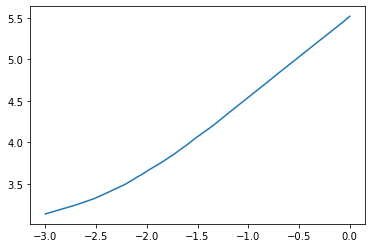

<ipython-input-15-14d59b5d413d>:10: RuntimeWarning: divide by zero encountered in log
  return np.log(cn_r), np.log(r_options)


In [17]:
cn_r, r_option = maximum_likelihood_estimation(sphere_1_6)

In [24]:
correlated_dimension(cn_r, r_option, -2, 0)

0.9729915958538216

```Two last comments:```
- ```It is common, when having a lot of features, to "compress" them using PCA. Well, now you have some more tools in your toolbox, that might have a serious edge over the PCA - they aren't linear. Use them.```
- ```In many cases, the assumption of the data being derived from an underlying manifold is simply incorrect: The most straightforward example for such case is 1-hot encoded vectors. This kind of data can't be mathematically described the same way, and so approaches for compressing such vectors will be of different nature.```